In [10]:
DF_PATH       = "../data/processed/2_preprocessed_df.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters_counts.pkl"




ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageWorkedWith',    'DatabaseWorkedWith',    'WebframeWorkedWith',    'MiscTechWorkedWith']

EXPORT_PATH    = "../data/processed/2_cleaned_data.pkl"

In [3]:
# Load packages
import pandas as pd 
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [13]:
# Read Data 
encoded_dfs = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [14]:
encoded_dfs["DevType"]

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,"Developer, mobile",Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,System administrator
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exclude Roles

In [15]:
# Exclude roles
EXCULDE_ROLES = ['Designer', 'Educator', 'Marketing or sales professional', 'Engineering manager',
                 'Product manager', 'Senior executive/VP', "Engineer, site reliability"]

for role in EXCULDE_ROLES:
    encoded_dfs = encoded_dfs.drop(("DevType", role), axis=1)

### Filter data

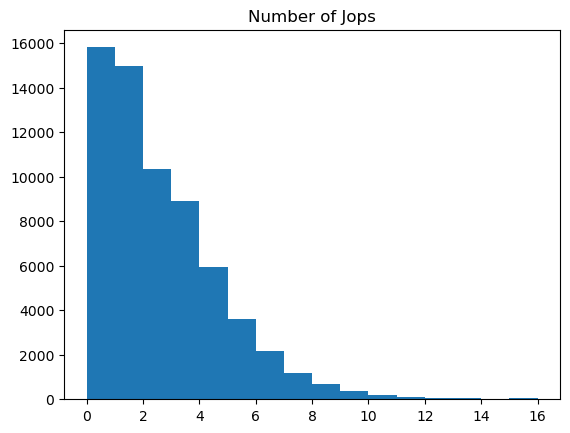

In [18]:
freq_jops = encoded_dfs[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles, freq_roles.max())
plt.title('Number of Jops')
plt.show()

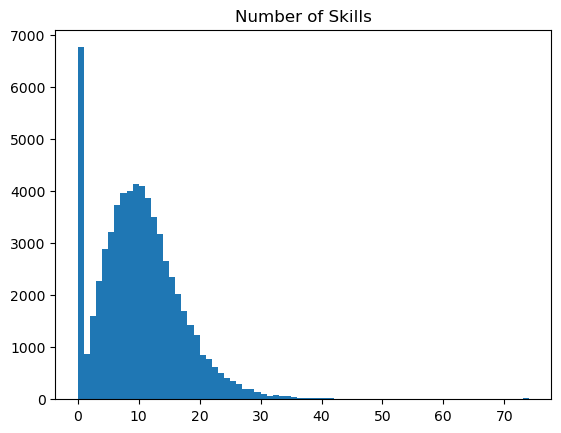

In [17]:
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title('Number of Skills')
plt.show()

In [19]:
# Filter frequencies 
JOPS_RANGE = [1,2]
TECH_RANGE  = [3,15]

In [24]:
# Create masks 
role_mask   = (freq_jops >= JOPS_RANGE[0]) & (freq_jops <= JOPS_RANGE[1])
tech_mask   = (freq_tech >= TECH_RANGE[0])   & (freq_tech <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

In [25]:
features_df = features_df.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()

### Merge & Export data

In [27]:
# Add second level indexing 
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])



NotImplementedError: isna is not defined for MultiIndex

In [28]:
# Concatenate
df = pd.concat([encoded_dfs, features_df], axis=1)

In [29]:
# Export 
df.to_pickle(EXPORT_PATH)